In [98]:
from nltk import word_tokenize
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams[ 'figure.figsize' ] = ( 14, 14 )

%matplotlib inline


In [99]:
def get_pos_neg_words():
    def get_words(url):
        import requests
        words = requests.get(url).content.decode('latin-1')
        word_list = words.split('\n')
        index = 0
        while index < len(word_list):
            word = word_list[index]
            if ';' in word or not word:
                word_list.pop(index)
            else:
                index += 1
        return word_list

    # Get lists of positive and negative words
    p_url = 'http://ptrckprry.com/course/ssd/data/positive-words.txt'
    n_url = 'http://ptrckprry.com/course/ssd/data/negative-words.txt'
    positive_words = get_words(p_url)
    negative_words = get_words(n_url)
    return positive_words, negative_words


positive_words, negative_words = get_pos_neg_words()
sentiment_dict = dict(zip(positive_words + negative_words,
                          [1 for _ in range(len(positive_words))] + [-1 for _ in range(len(negative_words))]))

In [100]:
def get_sentiment(description):
    try:
        words = word_tokenize(description)
        return sum(map(lambda x: sentiment_dict.get(x.lower(), 0), words)) / len(words)
    except:
        return np.NaN

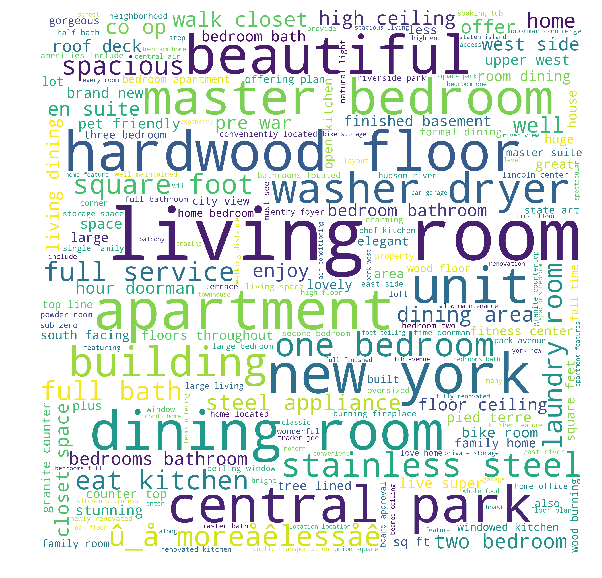

In [101]:
text = ' '.join(df['Description'].apply(str))

wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=3000).generate(text.lower())

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [106]:
STOPWORDS.add("dining room")
STOPWORDS.add("living room")
STOPWORDS.add("bedroom")
STOPWORDS.add("new york")
STOPWORDS.add("apartment")
STOPWORDS.add("living")
STOPWORDS.add("dining")
STOPWORDS.add("room")
STOPWORDS.add("york")

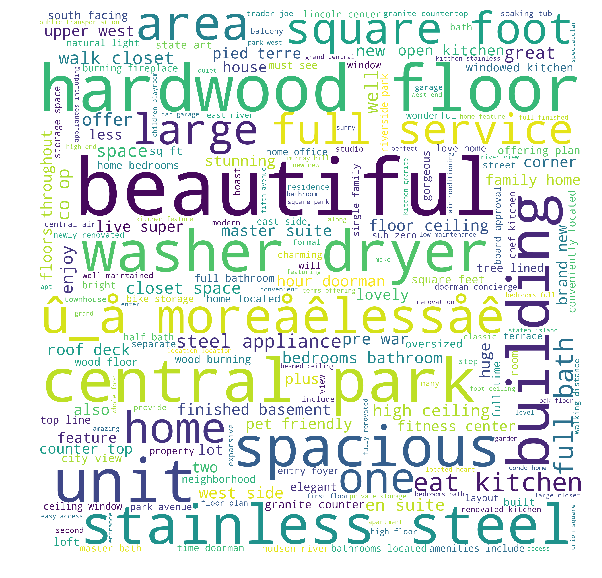

In [107]:
text = ' '.join(df['Description'].apply(str))

wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=3000).generate(text.lower())

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [59]:
df = pd.read_csv("Final_zillowdata.csv", sep=',', encoding = "ISO-8859-1")
df.head(5)

,Address,City,State,Zip,Beds,Bath,Size(sqft),Price,Type,Year Built,Days on Zillow,Description,Zestimate,URL
0,968 Rogers Pl,Bronx,NY,10459,3,1,510,"$510,000",Single Family,1901,171 Days,This 510 square foot single family home has 3 ...,"$456,525",https://www.zillow.com/homes/for_sale/homedeta...
1,1030 Prospect Ave,Bronx,NY,10459,3,2,"3,917","$570,000",Multi Family,1910,554 Days,Great Investment mixed used property for retai...,"$571,668",https://www.zillow.com/homes/for_sale/homedeta...
2,1174 Fox St,Bronx,NY,10459,3,2,"1,188","$435,000",Single Family,1991,48 Days,This 1188 square foot single family home has 3...,"$425,904",https://www.zillow.com/homes/for_sale/homedeta...
3,Ave # C,Bronx,NY,10459,2,2,"1,090","$275,000",,1994,64 Days,"Must see Duplex Condo, move in ready. Features...","$276,958",https://www.zillow.com/homes/for_sale/homedeta...
4,E 164TH St,Bronx,NY,10459,Studio,--,"3,021","$630,000",Multi Family,1910,128 Days,Brick Legal Three Family with 4 apartments and...,"$637,369",https://www.zillow.com/homes/for_sale/homedeta...


In [74]:
df['Sentiment'] = df['Description'].apply(get_sentiment)